In [9]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences





In [10]:
# Step 1: Load the IMDB dataset (only top 10,000 frequent words are used)
vocab_size = 10000  # Vocabulary size
max_length = 100     # Maximum length of each review

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)



In [11]:
# Step 2: Preprocessing - Pad sequences to ensure uniform input length
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')



In [12]:
# Step 3: Build the RNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length),  # Embedding layer
    SimpleRNN(32, activation='tanh', return_sequences=False),  # RNN layer
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])



In [13]:
# Step 4: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [14]:
# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))



Epoch 1/5


I0000 00:00:1729496366.782041     109 service.cc:145] XLA service 0x7dbb2c006790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729496366.782093     109 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729496366.782097     109 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 16/391 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4698 - loss: 0.7027

I0000 00:00:1729496369.114185     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5291 - loss: 0.6907 - val_accuracy: 0.7224 - val_loss: 0.5639
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7645 - loss: 0.5103 - val_accuracy: 0.7842 - val_loss: 0.4929
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8593 - loss: 0.3573 - val_accuracy: 0.7557 - val_loss: 0.5371
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9200 - loss: 0.2335 - val_accuracy: 0.7556 - val_loss: 0.5407
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9553 - loss: 0.1430 - val_accuracy: 0.7836 - val_loss: 0.5932


In [15]:
# Step 6: Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7831 - loss: 0.6027
Test Accuracy: 0.7836


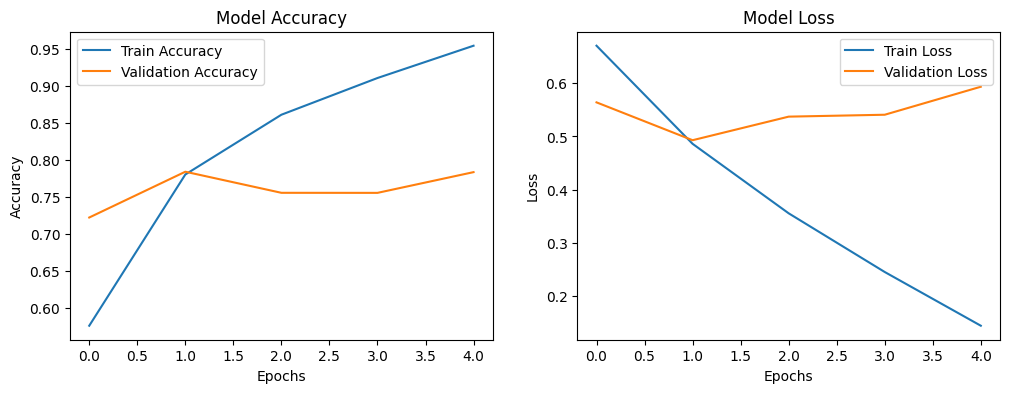

In [16]:
# Optional: Plot training and validation accuracy/loss
import matplotlib.pyplot as plt
def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')

    plt.show()

plot_metrics(history)
